In [1]:
import folium
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import box
import numpy as np

In [2]:
import matplotlib.font_manager as fm

# 한국어 출력을 위한 폰트 설정
plt.rc('font', family='NanumGothic') 

# 마이너스 기호가 깨지는 것을 방지
plt.rcParams['axes.unicode_minus'] = False

In [10]:
gdf = gpd.read_file("data/읍면동/emd.shp", encoding='euc-kr')
gdf

,EMD_CD,EMD_ENG_NM,EMD_KOR_NM,geometry
0,11110101,Cheongun-dong,청운동,"POLYGON ((953700.022 1954605.065, 953693.871 1..."
1,11110102,Singyo-dong,신교동,"POLYGON ((953233.465 1953996.984, 953235.183 1..."
2,11110103,Gungjeong-dong,궁정동,"POLYGON ((953560.228 1954257.466, 953561.190 1..."
3,11110104,Hyoja-dong,효자동,"POLYGON ((953519.843 1953890.785, 953518.489 1..."
4,11110105,Changseong-dong,창성동,"POLYGON ((953516.123 1953734.362, 953516.526 1..."
...,...,...,...,...
5061,52800390,Sangseo-myeon,상서면,"POLYGON ((924979.638 1740610.214, 924985.428 1..."
5062,52800400,Haseo-myeon,하서면,"POLYGON ((924910.563 1749481.985, 924971.300 1..."
5063,52800410,Julpo-myeon,줄포면,"POLYGON ((929554.188 1736493.399, 929554.106 1..."
5064,52800420,Wido-myeon,위도면,"MULTIPOLYGON (((890358.231 1737258.351, 890358..."


In [11]:
# 서울시 추출: 11로 시작하는 데이터만 필터링
gdf = gdf[gdf['EMD_CD'].str.startswith('11')]
gdf

,EMD_CD,EMD_ENG_NM,EMD_KOR_NM,geometry
0,11110101,Cheongun-dong,청운동,"POLYGON ((953700.022 1954605.065, 953693.871 1..."
1,11110102,Singyo-dong,신교동,"POLYGON ((953233.465 1953996.984, 953235.183 1..."
2,11110103,Gungjeong-dong,궁정동,"POLYGON ((953560.228 1954257.466, 953561.190 1..."
3,11110104,Hyoja-dong,효자동,"POLYGON ((953519.843 1953890.785, 953518.489 1..."
4,11110105,Changseong-dong,창성동,"POLYGON ((953516.123 1953734.362, 953516.526 1..."
...,...,...,...,...
462,11740106,Dunchon-dong,둔촌동,"POLYGON ((969669.593 1948748.489, 969656.716 1..."
463,11740107,Amsa-dong,암사동,"POLYGON ((968514.203 1950677.234, 968505.336 1..."
464,11740108,Seongnae-dong,성내동,"POLYGON ((967686.073 1948534.011, 967685.029 1..."
465,11740109,Cheonho-dong,천호동,"POLYGON ((968336.280 1950222.697, 968337.437 1..."


In [12]:
# 영어 이름 열 없애기
gdf = gdf.drop('EMD_ENG_NM', axis=1)
gdf

,EMD_CD,EMD_KOR_NM,geometry
0,11110101,청운동,"POLYGON ((953700.022 1954605.065, 953693.871 1..."
1,11110102,신교동,"POLYGON ((953233.465 1953996.984, 953235.183 1..."
2,11110103,궁정동,"POLYGON ((953560.228 1954257.466, 953561.190 1..."
3,11110104,효자동,"POLYGON ((953519.843 1953890.785, 953518.489 1..."
4,11110105,창성동,"POLYGON ((953516.123 1953734.362, 953516.526 1..."
...,...,...,...
462,11740106,둔촌동,"POLYGON ((969669.593 1948748.489, 969656.716 1..."
463,11740107,암사동,"POLYGON ((968514.203 1950677.234, 968505.336 1..."
464,11740108,성내동,"POLYGON ((967686.073 1948534.011, 967685.029 1..."
465,11740109,천호동,"POLYGON ((968336.280 1950222.697, 968337.437 1..."


<Axes: >

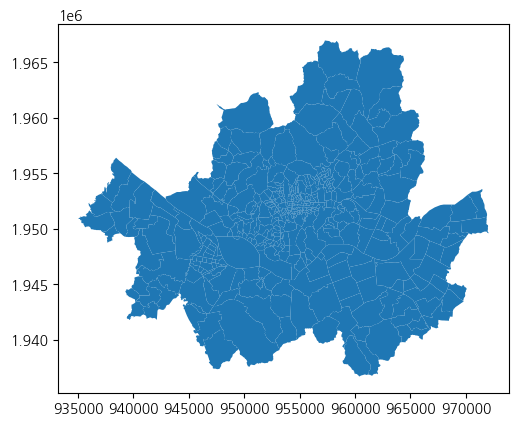

In [18]:
gdf.plot()

In [15]:
import geopandas as gpd
from shapely.geometry import box
import numpy as np

# 서울시 데이터만 필터링
gdf_seoul = gdf[gdf['EMD_CD'].str.startswith('11')]

# gdf_seoul의 전체 범위를 구합니다.
minx, miny, maxx, maxy = gdf_seoul.geometry.total_bounds

# 100m x 100m 격자 생성을 위한 x, y 좌표 배열 생성
x_coords = np.arange(minx, maxx, 100)
y_coords = np.arange(miny, maxy, 100)

# 격자(Polygon) 생성
grid = []
for x in x_coords:
    for y in y_coords:
        grid.append(box(x, y, x+100, y+100))

# GeoDataFrame으로 변환
grid_gdf = gpd.GeoDataFrame(geometry=gpd.GeoSeries(grid))

# grid_gdf를 사용해 필요한 작업 수행 (예: 격자별 데이터 집계 등)

In [22]:
overlay_gdf = gpd.overlay(gdf, grid_gdf, how='intersection')

C:\Users\1qlqj\AppData\Local\Temp\ipykernel_30180\420136384.py:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: PROJCS["PCS_ITRF2000_TM",GEOGCS["ITRF2000",DATUM[" ...
Right CRS: None

  overlay_gdf = gpd.overlay(gdf, grid_gdf, how='intersection')


<Axes: >

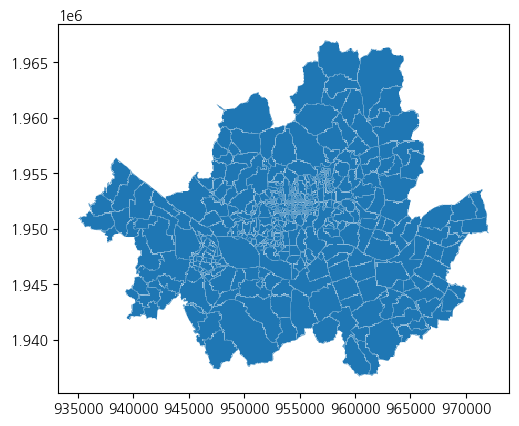

In [23]:
overlay_gdf.plot()

In [28]:
overlay_gdf.to_file("data/seoul_100_grid.shp", encoding='euc-kr')

In [25]:
# overlay_gdf가 이미 준비되어 있고, CRS가 WGS84(경위도 좌표)로 설정되어 있다고 가정합니다.
# 만약 CRS가 WGS84가 아니라면, folium에서 올바르게 표시하기 위해 변환해야 합니다.
# if overlay_gdf.crs != 'epsg:4326':
#     overlay_gdf = overlay_gdf.to_crs(epsg=4326)

# GeoDataFrame을 GeoJSON 형태로 변환
# geojson_data = overlay_gdf.to_json()

# folium 지도 객체 생성, 서울의 대략적 중심지 좌표를 기준으로 함
# m = folium.Map(location=[37.5665, 126.9780], zoom_start=11)

# GeoJSON 레이어를 지도에 추가
# folium.GeoJson(
#     geojson_data,
#     name='overlay'
# ).add_to(m)

# 레이어 컨트롤러 추가 (선택 사항)
# folium.LayerControl().add_to(m)

# 지도 표시
#m


In [29]:
overlay_gdf

,EMD_CD,EMD_KOR_NM,geometry
0,11110101,청운동,"POLYGON ((126.96239 37.58619, 126.96232 37.586..."
1,11110101,청운동,"MULTIPOLYGON (((126.96152 37.58656, 126.96143 ..."
2,11110101,청운동,"POLYGON ((126.96322 37.58596, 126.96278 37.586..."
3,11110101,청운동,"POLYGON ((126.96239 37.58703, 126.96239 37.587..."
4,11110101,청운동,"POLYGON ((126.96240 37.58752, 126.96260 37.587..."
...,...,...,...
73803,11740110,강일동,"POLYGON ((127.18201 37.56023, 127.18202 37.560..."
73804,11740110,강일동,"POLYGON ((127.18200 37.56099, 127.18197 37.560..."
73805,11740110,강일동,"POLYGON ((127.18153 37.56208, 127.18156 37.562..."
73806,11740110,강일동,"POLYGON ((127.18119 37.56302, 127.18128 37.562..."
